In [75]:
import pandas as pd
import re

In [76]:
def load_data(filepath):
    return pd.read_csv(filepath, sep=";", header=None, names=["text", "label"])

train_df = load_data("data/train.txt")
val_df = load_data("data/val.txt")
test_df=load_data("data/test.txt")

In [77]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df["label_id"] = le.fit_transform(train_df["label"])
val_df["label_id"] = le.transform(val_df["label"])
test_df["label_id"] = le.transform(test_df["label"])

In [78]:
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df["text"])

max_len = 100
X_train = pad_sequences(tokenizer.texts_to_sequences(train_df["text"]), maxlen=max_len)
X_val = pad_sequences(tokenizer.texts_to_sequences(val_df["text"]), maxlen=max_len)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df["text"]), maxlen=max_len)

y_train = train_df["label_id"].values
y_val = val_df["label_id"].values
y_test = test_df["label_id"].values

In [79]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

# Custom EarlyStopping callback to print when training stops early
class CustomEarlyStopping(EarlyStopping):
    def on_train_end(self, logs=None):
        super().on_train_end(logs)
        if self.stopped_epoch > 0:
            print(f"\n🚦 Early stopping triggered at epoch {self.stopped_epoch + 1}")
        else:
            print("\n✅ Training completed without early stopping")

# Build the model
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=max_len),
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Use custom early stopping
early_stop = CustomEarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],  # <- fixed typo from `callback` to `callbacks`
    verbose=1
)


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 26s 50ms/step - accuracy: 0.3327 - loss: 1.9245 - val_accuracy: 0.4455 - val_loss: 1.1976
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step - accuracy: 0.5660 - loss: 1.0143 - val_accuracy: 0.7370 - val_loss: 0.6373
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step - accuracy: 0.7732 - loss: 0.5453 - val_accuracy: 0.8225 - val_loss: 0.5146
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step - accuracy: 0.8782 - loss: 0.3770 - val_accuracy: 0.8930 - val_loss: 0.3944
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step - accuracy: 0.9256 - loss: 0.2646 - val_accuracy: 0.8980 - val_loss: 0.3462
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step - accuracy: 0.9471 - loss: 0.1981 - val_accuracy: 0.9185 - val_loss: 0.3045
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step - accuracy: 0.9601 - loss: 0.1499 - val_accuracy: 0.9150 - val_loss: 0.3082
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step - accuracy: 0.9633 - loss: 0

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 26s 51ms/step - accuracy: 0.3360 - loss: 1.8740 - val_accuracy: 0.5205 - val_loss: 1.1703
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step - accuracy: 0.6262 - loss: 0.9398 - val_accuracy: 0.7915 - val_loss: 0.6317
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step - accuracy: 0.8503 - loss: 0.5096 - val_accuracy: 0.8845 - val_loss: 0.4117
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step - accuracy: 0.9110 - loss: 0.3302 - val_accuracy: 0.8995 - val_loss: 0.3303
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step - accuracy: 0.9214 - loss: 0.2735 - val_accuracy: 0.9055 - val_loss: 0.3201
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step - accuracy: 0.9484 - loss: 0.1979 - val_accuracy: 0.9250 - val_loss: 0.2503
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step - accuracy: 0.9553 - loss: 0.1616 - val_accuracy: 0.9210 - val_loss: 0.2851
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step - accuracy: 0.9618 - loss: 0

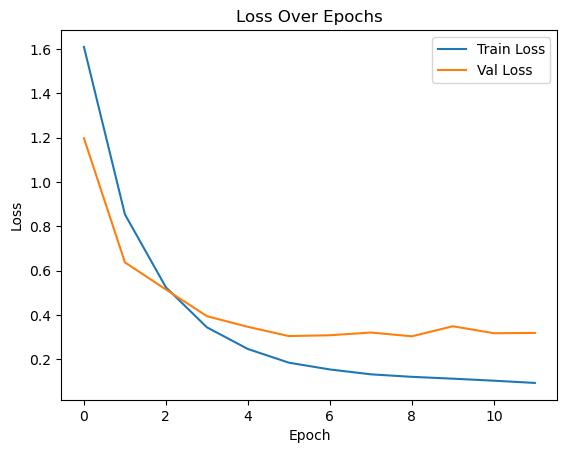

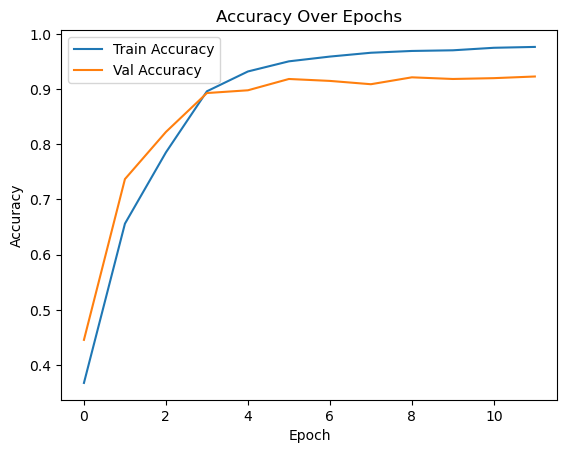

In [80]:
import matplotlib.pyplot as plt

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [81]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test).argmax(axis=1)
print(classification_report(y_test, y_pred, target_names=le.classes_))


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
              precision    recall  f1-score   support

       anger       0.89      0.97      0.93       275
        fear       0.89      0.90      0.90       224
         joy       0.94      0.94      0.94       695
        love       0.80      0.79      0.79       159
     sadness       0.97      0.96      0.96       581
    surprise       0.84      0.64      0.72        66

    accuracy                           0.92      2000
   macro avg       0.89      0.86      0.87      2000
weighted avg       0.92      0.92      0.92      2000

